In [1]:
### Pseudocode

# Phase 1: Truck Route
# Solve truck-only TSP using method of choice (or compare multiple methods) - e.g, nearest neighbor, 2-opt, genetic algorithm
# Formulations are widely available

# Phase 2: Drone Integration
# Start with 1 drone
# Try delivering to each node using a drone instead of the truck separately and compapre savings (similar to Clark-Wright savings)
# Use drone travel time as fraction of truck travel time for simplicity
# If saving found, consider drone meeting truck while en route to next node
# If comfortable, try adding more drones and repeat above steps, including multiple drones delivering to different nodes simultaneously (trucks skipping two or more consecutive nodes in the route sequence)

## TSP: Euclidean distance formulation and plotting

This section formulates a Travelling Salesman Problem using Euclidean distances, solves it (exact for small n, heuristic 2-opt for larger n), and plots the final route.

Usage: run the cells below. The demo cell generates random points, solves the TSP, prints the route length, and shows a matplotlib plot.

In [2]:
# Imports and helper functions
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations


def euclidean_dist(a, b):
    return math.hypot(a[0]-b[0], a[1]-b[1])


def distance_matrix(points):
    n = len(points)
    D = [[0.0]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                D[i][j] = euclidean_dist(points[i], points[j])
    return D


def route_length(route, D):
    s = 0.0
    for k in range(len(route)):
        i = route[k]
        j = route[(k+1) % len(route)]
        s += D[i][j]
    return s


def plot_route(points, route, title=None):
    xs = [points[i][0] for i in route] + [points[route[0]][0]]
    ys = [points[i][1] for i in route] + [points[route[0]][1]]
    plt.figure(figsize=(6,6))
    plt.plot(xs, ys, '-o')
    for idx, (x, y) in enumerate(points):
        plt.text(x, y, str(idx))
    if title:
        plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [3]:
# Exact solver for small n and 2-opt heuristic
from itertools import permutations


def tsp_exact(D):
    n = len(D)
    best = None
    best_len = float('inf')
    nodes = list(range(n))
    start = 0
    for perm in permutations(nodes[1:]):
        route = [start] + list(perm)
        l = route_length(route, D)
        if l < best_len:
            best_len = l
            best = route
    return best, best_len


def two_opt(route, D):
    n = len(route)
    improved = True
    best = route[:]
    best_len = route_length(best, D)
    while improved:
        improved = False
        for i in range(1, n-1):
            for j in range(i+1, n):
                if j - i == 1:
                    continue
                new_route = best[:i] + best[i:j][::-1] + best[j:]
                new_len = route_length(new_route, D)
                if new_len < best_len:
                    best = new_route
                    best_len = new_len
                    improved = True
    return best, best_len


def tsp_solve(points):
    D = distance_matrix(points)
    n = len(points)
    if n <= 10:
        route, l = tsp_exact(D)
        method = 'exact'
    else:
        # nearest neighbor start
        start = 0
        un = set(range(n))
        route = [start]
        un.remove(start)
        while un:
            last = route[-1]
            nxt = min(un, key=lambda x: D[last][x])
            route.append(nxt)
            un.remove(nxt)
        route, l = two_opt(route, D)
        method = '2-opt'
    return route, l, D, method


Method: exact, total length: 344.77
Route: [0, 8, 3, 5, 1, 9, 6, 4, 2, 7]


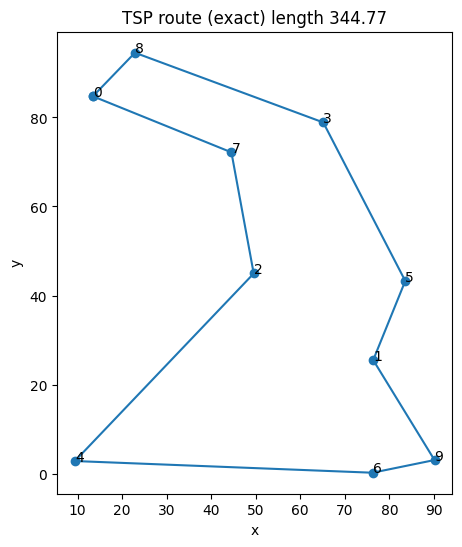

In [5]:
# Demo: generate points, solve, and plot
import random
random.seed(1)

n = 10  # change to <=10 for exact solve; increase for larger tests
points = [(random.random()*100, random.random()*100) for _ in range(n)]

route, total_len, D, method = tsp_solve(points)
print(f"Method: {method}, total length: {total_len:.2f}")
print("Route:", route)
plot_route(points, route, title=f"TSP route ({method}) length {total_len:.2f}")
